# Possible recommendations
- Start recording SBS data only when underwater, seems like the SBS 
- There might be issues in conducting loop closure experiments --> Check again
- IMU internal clock is probably used in the ROS 2 version of the driver

Files 2 and 5 seem fine
Although, loop closure seems to be an issue, the SONAR cannot lock on target

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [8]:
files=glob("../../*.csv")
files

['../../output.csv']

In [12]:
df=pd.read_csv(files[0])
df.head()

,Timestamp,Pose_X,Confidence_1,Pose_Y,Confidence_2,Pose_Z,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z,Sonar_distance_1,Sonar_distance_2,Sonar_distance_3
0,1.727325e+09,0.669055,0.0,1.472049,0.0,0.000049,0.030341,0.059114,0.059114,665.0,1495.0,0.0
1,1.727325e+09,0.669314,0.0,1.472534,0.0,0.000508,0.041071,0.145308,0.145308,665.0,1495.0,0.0
2,1.727325e+09,0.669945,0.0,1.474195,0.0,0.002061,0.087732,0.263443,0.263443,665.0,1495.0,0.0
3,1.727325e+09,0.671358,0.0,1.478250,0.0,0.005829,0.089599,0.281193,0.281193,662.0,1499.0,0.0
4,1.727325e+09,0.673258,0.0,1.483820,0.0,0.010860,0.089431,0.321026,0.321026,662.0,1499.0,0.0


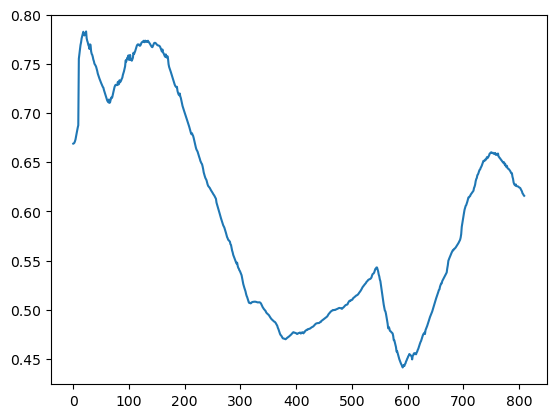

In [13]:
plt.plot(df["Pose_X"])
#plt.ylim(-300,300)

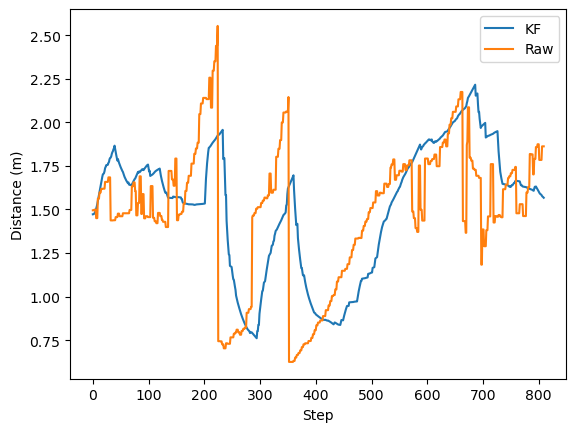

In [17]:
plt.plot(df["Pose_Y"])
plt.plot(df["Sonar_distance_2"]/1000)
plt.xlabel("Step")
plt.ylabel("Distance (m)")
plt.legend(["KF","Raw"])

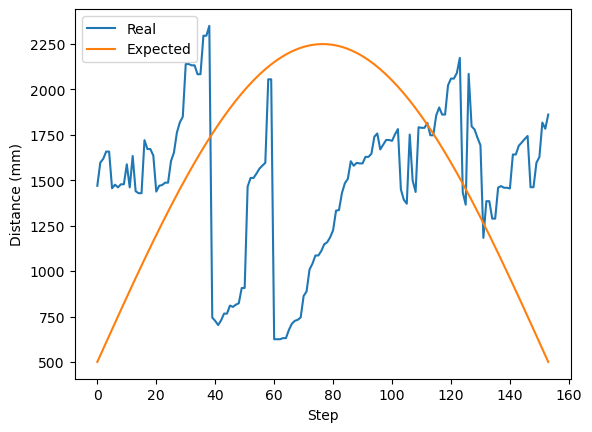

In [39]:
import numpy as np
plt.plot(df["Sonar_Distance_2"])
#expected1=np.linspace(500,2250,len(df["Sonar_Distance_2"])//2)
#expected2=np.linspace(2250,500,len(df["Sonar_Distance_2"])//2)
#plt.plot(np.concatenate((expected1, expected2)))
array=np.linspace(0,np.pi,len(df["Sonar_Distance_2"]))
plt.plot(1750*np.sin(array)+500)
plt.xlabel("Step")
plt.ylabel("Distance (mm)")
plt.legend(["Real","Expected"])

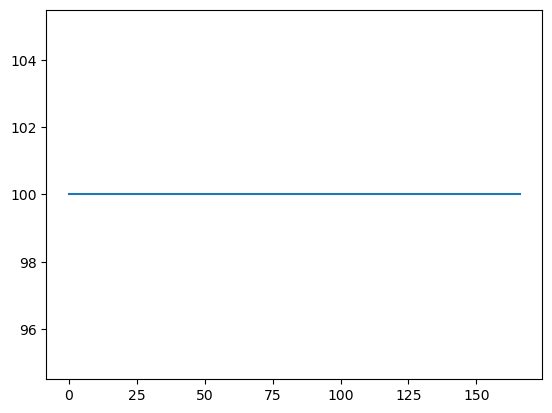

In [22]:
plt.plot(df["Confidence_1"])

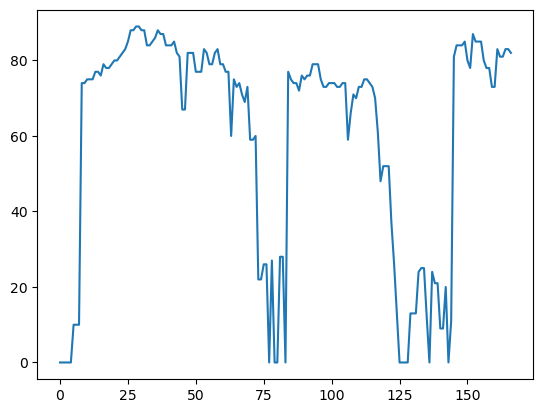

In [23]:
plt.plot(df["Confidence_2"])